In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/SDSS_ML_P_SI_ZOHO/sdss_100k_galaxy_form_burst.csv'
data_sdss_raw = pd.read_csv(file_path, sep=",", skiprows=1, low_memory=False)

# Inspect the data
print(data_sdss_raw.head())
print(data_sdss_raw.info())
print(data_sdss_raw.isnull().sum())
print(data_sdss_raw.describe())

                 objid            specobjid          ra       dec           u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177    21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072    20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003    23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059    20.12374   
4  1237648702973149350   332154249716721664  198.706864 -1.046217 -9999.00000   

            g         r         i         z  modelFlux_u  ...  psfMag_z  \
0    20.26633  19.32409  18.64037  18.23833     2.007378  ...  19.43575   
1    19.32016  18.67888  18.24693  18.04122     5.403369  ...  18.85012   
2    21.19671  19.92297  19.31443  18.68396     0.295693  ...  19.42235   
3    18.41520  17.47202  17.05297  16.72423     8.920645  ...  18.03204   
4 -9999.00000  18.37762  18.13383  17.78497     0.000000  ...  19.02880   

       expAB_u      expAB_g   expAB_r   expAB_i   expAB_z   cl

In [ ]:
import numpy as np

data_sdss_replace = data_sdss_raw.copy()

# Replace -9999 with NaN
data_sdss_replace = data_sdss_replace.replace(-9999, np.nan)

# Verify
print(data_sdss_replace[['u','g','z','expAB_u']].head(10))
print(data_sdss_replace.head())
print(data_sdss_replace.info())
print(data_sdss_replace.isnull().sum())

          u         g         z   expAB_u
0  21.73818  20.26633  18.23833  0.099951
1  20.66761  19.32016  18.04122  0.366549
2  23.63531  21.19671  18.68396  0.050000
3  20.12374  18.41520  16.72423  0.310763
4       NaN       NaN  17.78497       NaN
5  19.47473  18.18575  16.89580  0.754158
6  20.24418  18.62780  16.97725  0.273089
7  18.46020  17.27620  16.04085  0.849475
8  18.70091  17.50793  16.54133  0.419439
9  19.88486  18.45146  16.73163  0.699929
                 objid            specobjid          ra       dec         u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177  21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072  20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003  23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059  20.12374   
4  1237648702973149350   332154249716721664  198.706864 -1.046217       NaN   

          g         r         i         z  modelFlux_u  ...  ps

In [ ]:
data_sdss_impute = data_sdss_replace.copy()

# Import library
from sklearn.impute import SimpleImputer

# Select numeric columns
numeric_cols = data_sdss_impute.select_dtypes(include=np.number).columns

# Median imputer
median_imputer = SimpleImputer(strategy='median')
data_sdss_impute[numeric_cols] = median_imputer.fit_transform(data_sdss_impute[numeric_cols])

# Verify no more missing values
print(data_sdss_impute.head())
print(data_sdss_impute.info())
print(data_sdss_impute.isnull().sum())


          objid     specobjid          ra       dec         u         g  \
0  1.237647e+18  8.175186e+18   82.038679  0.847177  21.73818  20.26633   
1  1.237647e+18  8.175187e+18   82.138894  1.063072  20.66761  19.32016   
2  1.237647e+18  8.175187e+18   82.028510  1.104003  23.63531  21.19671   
3  1.237649e+18  3.321523e+17  198.544469 -1.097059  20.12374  18.41520   
4  1.237649e+18  3.321542e+17  198.706864 -1.046217  19.34985  18.07271   

          r         i         z  modelFlux_u  ...  psfMag_z   expAB_u  \
0  19.32409  18.64037  18.23833     2.007378  ...  19.43575  0.099951   
1  18.67888  18.24693  18.04122     5.403369  ...  18.85012  0.366549   
2  19.92297  19.31443  18.68396     0.295693  ...  19.42235  0.050000   
3  17.47202  17.05297  16.72423     8.920645  ...  18.03204  0.310763   
4  18.37762  18.13383  17.78497     0.000000  ...  19.02880  0.508736   

    expAB_g   expAB_r   expAB_i   expAB_z   class     subclass  redshift  \
0  0.311864  0.289370  0.270588  0

In [ ]:
data_sdss_nonulls = data_sdss_replace.copy()

# Drop all rows with any missing values
data_sdss_nonulls = data_sdss_nonulls.dropna()

# Verify the result
print(data_sdss_nonulls.head())
print(data_sdss_nonulls.info())
print(data_sdss_nonulls.isnull().sum())
print(data_sdss_nonulls.describe())

                 objid            specobjid          ra       dec         u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177  21.73818   
1  1237646588247540577  8175186822156277760   82.138894  1.063072  20.66761   
2  1237646588247540758  8175187097034184704   82.028510  1.104003  23.63531   
3  1237648702973083853   332152325571373056  198.544469 -1.097059  20.12374   
5  1237648702973149360   332153425083000832  198.720675 -1.083876  19.47473   

          g         r         i         z  modelFlux_u  ...  psfMag_z  \
0  20.26633  19.32409  18.64037  18.23833     2.007378  ...  19.43575   
1  19.32016  18.67888  18.24693  18.04122     5.403369  ...  18.85012   
2  21.19671  19.92297  19.31443  18.68396     0.295693  ...  19.42235   
3  18.41520  17.47202  17.05297  16.72423     8.920645  ...  18.03204   
5  18.18575  17.52763  17.14837  16.89580    16.220930  ...  18.23220   

    expAB_u   expAB_g   expAB_r   expAB_i   expAB_z   class     subclass  \
0  0.09995

In [ ]:
# Unique values in 'class'
print("Class column unique values:")
print(data_sdss_nonulls['class'].unique())

# Unique values in 'subclass'
print("\nSubclass column unique values:")
print(data_sdss_nonulls['subclass'].unique())


Class column unique values:
['GALAXY']

Subclass column unique values:
['STARFORMING' 'STARBURST']


In [ ]:
# Encode 'subclass' column: STARFORMING -> 0, STARBURST -> 1
data_sdss_nonulls['subclass'] = data_sdss_nonulls['subclass'].map({'STARFORMING': 0, 'STARBURST': 1})

# Verify transformation
print(data_sdss_nonulls['subclass'].value_counts())


subclass
0    73518
1    23960
Name: count, dtype: int64


In [ ]:
import numpy as np

# Make a copy
data_sdss_iqr = data_sdss_nonulls.copy()

# Identify numeric columns except ids and target
numeric_cols = data_sdss_iqr.select_dtypes(include=[np.number]).columns

cols_to_exclude = ['objid', 'specobjid', 'subclass']  # do not clip these
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

# Apply IQR clipping
for col in numeric_cols:
    Q1 = data_sdss_iqr[col].quantile(0.25)
    Q3 = data_sdss_iqr[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip
    data_sdss_iqr[col] = np.clip(data_sdss_iqr[col], lower_bound, upper_bound)

print("IQR outlier clipping completed.")


IQR outlier clipping completed.


In [ ]:
print(data_sdss_iqr.head())
print(data_sdss_iqr.info())
print(data_sdss_iqr.isnull().sum())
print(data_sdss_iqr.describe())

                 objid            specobjid          ra       dec          u  \
0  1237646587710669400  8175185722644649984   82.038679  0.847177  21.738180   
1  1237646588247540577  8175186822156277760   82.138894  1.063072  20.667610   
2  1237646588247540758  8175187097034184704   82.028510  1.104003  21.888454   
3  1237648702973083853   332152325571373056  198.544469 -1.097059  20.123740   
5  1237648702973149360   332153425083000832  198.720675 -1.083876  19.474730   

           g          r          i         z  modelFlux_u  ...  psfMag_z  \
0  20.217987  19.314826  18.640370  18.23833     2.007378  ...  19.43575   
1  19.320160  18.678880  18.246930  18.04122     5.403369  ...  18.85012   
2  20.217987  19.314826  19.033301  18.68396     0.295693  ...  19.42235   
3  18.415200  17.472020  17.052970  16.72423     8.920645  ...  18.03204   
5  18.185750  17.527630  17.148370  16.89580    16.220930  ...  18.23220   

    expAB_u   expAB_g   expAB_r   expAB_i   expAB_z   class  s

In [ ]:
# Drop irrelevant columns
X = data_sdss_iqr.drop(columns=['objid', 'specobjid', 'class', 'subclass', 'redshift'])

# Target
y = data_sdss_iqr['redshift']

# Verify
print(X.head())
print(y.head())


           ra       dec          u          g          r          i         z  \
0   82.038679  0.847177  21.738180  20.217987  19.314826  18.640370  18.23833   
1   82.138894  1.063072  20.667610  19.320160  18.678880  18.246930  18.04122   
2   82.028510  1.104003  21.888454  20.217987  19.314826  19.033301  18.68396   
3  198.544469 -1.097059  20.123740  18.415200  17.472020  17.052970  16.72423   
5  198.720675 -1.083876  19.474730  18.185750  17.527630  17.148370  16.89580   

   modelFlux_u  modelFlux_g  modelFlux_r  ...  psfMag_r  psfMag_g  psfMag_i  \
0     2.007378     7.823640     18.63581  ...  20.75200  21.66492  20.07646   
1     5.403369    18.703640     33.76298  ...  19.67125  20.23801  19.19277   
2     0.295693     3.318924     10.73388  ...  20.66160  21.83267  20.00731   
3     8.920645    43.044740    102.61010  ...  18.77640  19.75832  18.38868   
5    16.220930    53.173800     97.48736  ...  18.92355  19.66453  18.44931   

   psfMag_z   expAB_u   expAB_g   expA

In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 77982
Test set size: 19496


                     u         g         r         i         z  modelFlux_u  \
u             1.000000  0.963928  0.912248  0.886147  0.857490    -0.907216   
g             0.963928  1.000000  0.980081  0.963276  0.941486    -0.885172   
r             0.912248  0.980081  1.000000  0.994354  0.983045    -0.843352   
i             0.886147  0.963276  0.994354  1.000000  0.992968    -0.808721   
z             0.857490  0.941486  0.983045  0.992968  1.000000    -0.771001   
modelFlux_u  -0.907216 -0.885172 -0.843352 -0.808721 -0.771001     1.000000   
modelFlux_g  -0.885069 -0.926315 -0.919684 -0.896882 -0.869217     0.954726   
modelFlux_r  -0.838910 -0.911675 -0.942001 -0.932977 -0.917676     0.881878   
modelFlux_i  -0.807458 -0.892064 -0.935501 -0.936777 -0.925871     0.840407   
petroRad_r   -0.684451 -0.730951 -0.724673 -0.706456 -0.693744     0.672281   
petroFlux_u  -0.890284 -0.871562 -0.834519 -0.802664 -0.768746     0.972563   
petroFlux_g  -0.881513 -0.922369 -0.914372 -0.892125

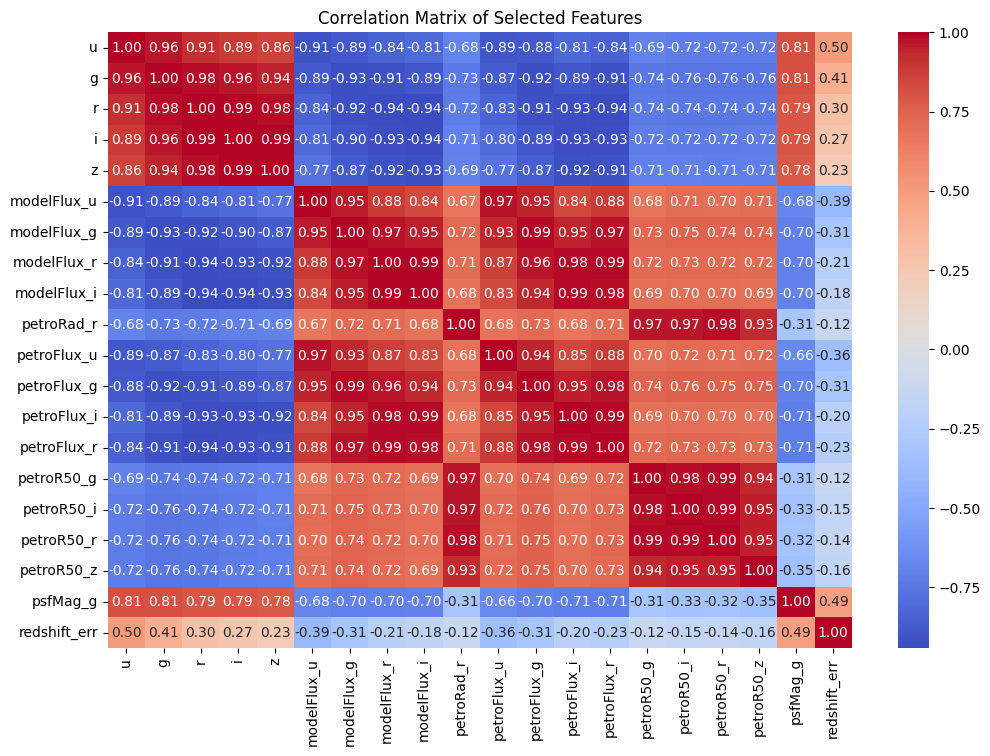

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert scaled selected features to DataFrame
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_columns)

# Compute correlation matrix
corr_matrix = X_train_selected_df.corr()

# Display correlation matrix
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Selected Features")
plt.show()


Decision Tree Performance:
MAE  : 0.028467425785779165
RMSE : 0.042166436963069855
R²   : 0.5825722726519247


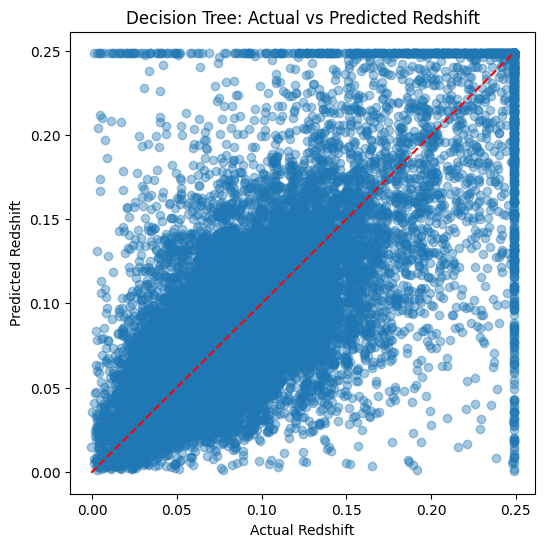

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1️ Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# 2️ Train the model
dt.fit(X_train, y_train)

# 3️ Predict on test data
y_pred = dt.predict(X_test)

# 4️ Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Performance:")
print(f"MAE  : {mae}")
print(f"RMSE : {rmse}")
print(f"R²   : {r2}")

# 5️ Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual Redshift")
plt.ylabel("Predicted Redshift")
plt.title("Decision Tree: Actual vs Predicted Redshift")
plt.show()


Random Forest Performance:
MAE  : 0.02061597227974897
RMSE : 0.028944205931471123
R²   : 0.8033152163733687


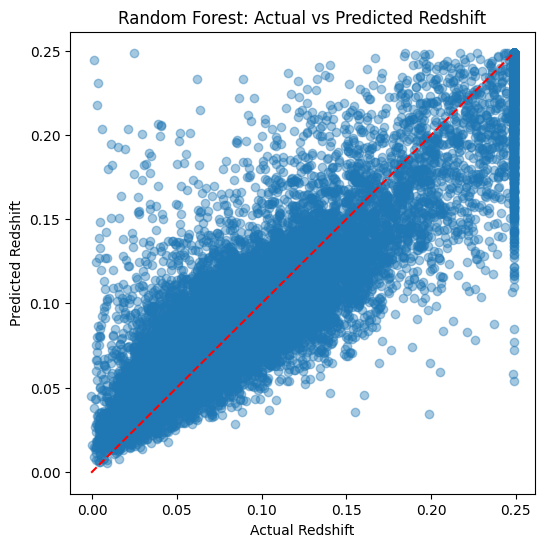

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1️ Initialize Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,      # number of trees
    random_state=42,
    n_jobs=-1              # use all cores
)

# 2️ Train the model
rf.fit(X_train, y_train)

# 3️ Predict on test data
y_pred_rf = rf.predict(X_test)

# 4️ Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"MAE  : {mae_rf}")
print(f"RMSE : {rmse_rf}")
print(f"R²   : {r2_rf}")

# 5️ Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual Redshift")
plt.ylabel("Predicted Redshift")
plt.title("Random Forest: Actual vs Predicted Redshift")
plt.show()


XGBoost Performance:
MAE  : 0.01964198330494929
RMSE : 0.027448606145328614
R²   : 0.823116193836082


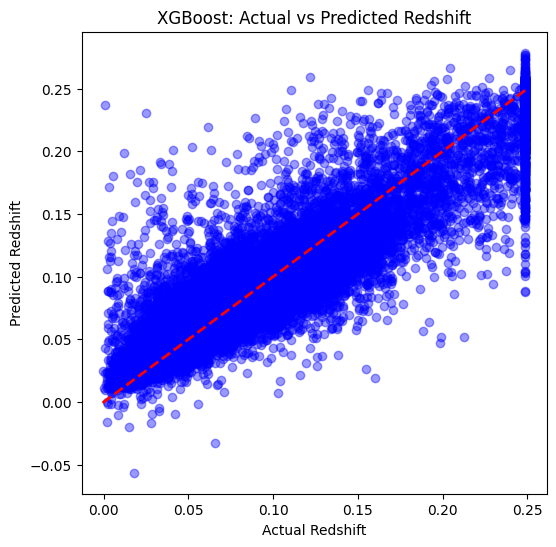

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1️ Initialize XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# 2️ Train the model
xgb_model.fit(X_train, y_train)

# 3️ Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# 4️ Evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Performance:")
print(f"MAE  : {mae_xgb}")
print(f"RMSE : {rmse_xgb}")
print(f"R²   : {r2_xgb}")

# 5️ Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.4, color='blue')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    linewidth=2
)
plt.xlabel("Actual Redshift")
plt.ylabel("Predicted Redshift")
plt.title("XGBoost: Actual vs Predicted Redshift")
plt.show()


In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# ------------------------------
# 1️ Define 3-fold CV (faster than 5)
# ------------------------------
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# ------------------------------
# 2️ Define models
# ------------------------------
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,    # can reduce to 50 for very quick testing
        max_depth=10,
        random_state=42,
        n_jobs=-1            # parallelize trees
    ),
    "XGBoost": XGBRegressor(
        n_estimators=100,    # can reduce to 50 for very quick testing
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,           # parallelize trees
        tree_method='hist'   # faster on CPU
    )
}

# ------------------------------
# 3️ Function to compute CV metrics efficiently
# ------------------------------
def cv_metrics_fast(model, X, y):
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

    # Simple CV, works on Colab CPU
    scores = cross_validate(model, X, y, cv=kf, scoring=scoring, n_jobs=-1)

    mae = -scores['test_neg_mean_absolute_error']
    rmse = np.sqrt(-scores['test_neg_mean_squared_error'])
    r2 = scores['test_r2']

    return {
        "MAE": (mae.mean(), mae.std()),
        "RMSE": (rmse.mean(), rmse.std()),
        "R2": (r2.mean(), r2.std())
    }

# ------------------------------
# 4️ Run CV for each model
# ------------------------------
for name, model in models.items():
    scores = cv_metrics_fast(model, X, y)
    print(f"\n{name} CV Performance:")
    print(f"MAE  : {scores['MAE'][0]:.5f} ± {scores['MAE'][1]:.5f}")
    print(f"RMSE : {scores['RMSE'][0]:.5f} ± {scores['RMSE'][1]:.5f}")
    print(f"R²   : {scores['R2'][0]:.5f} ± {scores['R2'][1]:.5f}")


Decision Tree CV Performance:
MAE  : 0.02889 ± 0.00005
RMSE : 0.04247 ± 0.00034
R²   : 0.58163 ± 0.00343

Random Forest CV Performance:
MAE  : 0.02291 ± 0.00017
RMSE : 0.03183 ± 0.00026
R²   : 0.76496 ± 0.00175

XGBoost CV Performance:
MAE  : 0.02057 ± 0.00011
RMSE : 0.02866 ± 0.00014
R²   : 0.80937 ± 0.00268


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

XGBoost CV Performance (Randomized Search):
MAE  : 0.01825
RMSE : 0.02602
R²   : 0.84292


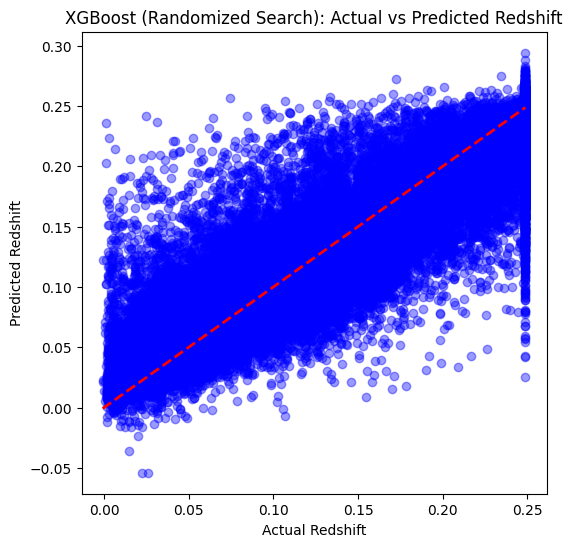

In [ ]:

from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1️ 5-fold CV
# ------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ------------------------------
# 2️ Base XGB model
# ------------------------------
xgb_model = XGBRegressor(
    random_state=42,
    n_jobs=-1,
    tree_method='hist'  # faster CPU training
)

# ------------------------------
# 3️ Hyperparameter distribution for Random Search
# ------------------------------
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# ------------------------------
# 4️ Randomized Search with 20 combinations
# ------------------------------
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,                # only 20 random samples
    scoring='neg_mean_squared_error',
    cv=kf,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)

print("Best Hyperparameters:", random_search.best_params_)

# ------------------------------
# 5️ Train best model on full dataset
# ------------------------------
best_xgb = random_search.best_estimator_
best_xgb.fit(X, y)

# ------------------------------
# 6️ Cross-validated predictions
# ------------------------------
y_pred_cv = cross_val_predict(best_xgb, X, y, cv=kf, n_jobs=-1)

# ------------------------------
# 7️ Compute Metrics
# ------------------------------
mae = mean_absolute_error(y, y_pred_cv)
rmse = np.sqrt(mean_squared_error(y, y_pred_cv))
r2 = r2_score(y, y_pred_cv)

print("\nXGBoost CV Performance (Randomized Search):")
print(f"MAE  : {mae:.5f}")
print(f"RMSE : {rmse:.5f}")
print(f"R²   : {r2:.5f}")

# ------------------------------
# 8️ Plot Actual vs Predicted
# ------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred_cv, alpha=0.4, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Actual Redshift")
plt.ylabel("Predicted Redshift")
plt.title("XGBoost (Randomized Search): Actual vs Predicted Redshift")
plt.show()

Top 10 Important Features:
         feature  importance
18   petroFlux_g    0.352179
3              g    0.067929
8    modelFlux_g    0.066503
37  redshift_err    0.057480
7    modelFlux_u    0.054655
31      psfMag_z    0.049346
29      psfMag_g    0.024036
30      psfMag_i    0.022563
11   modelFlux_z    0.016667
2              u    0.016446


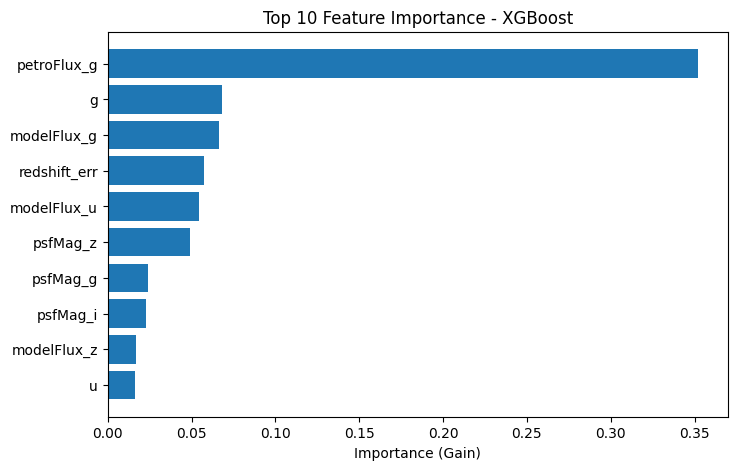

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance (gain-based)
importance = best_xgb.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'feature': importance.keys(),
    'importance': importance.values()
}).sort_values(by='importance', ascending=False)

# Show top 10 features
print("Top 10 Important Features:")
print(importance_df.head(10))

# Plot
plt.figure(figsize=(8, 5))
plt.barh(
    importance_df.head(10)['feature'],
    importance_df.head(10)['importance']
)
plt.gca().invert_yaxis()
plt.xlabel("Importance (Gain)")
plt.title("Top 10 Feature Importance - XGBoost")
plt.show()


In [ ]:
import os
import joblib
from xgboost import XGBRegressor

# ------------------------------
# 1️ Remove leakage feature
# ------------------------------
X_final = X.drop(columns=['redshift_err'], errors='ignore')
y_final = y

# ------------------------------
# 2️ Train final tuned XGBoost
# ------------------------------
final_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method='hist'
)

final_xgb.fit(X_final, y_final)

# ------------------------------
# 3️ Define save paths
# ------------------------------
model_path = '/content/drive/MyDrive/Stable_XAI_Saved_models/'
os.makedirs(model_path, exist_ok=True)

model_name = 'SDSS_S2_Reg_XGB.pkl'
median_name = 'SDSS_feature_medians.pkl'
columns_name = 'SDSS_feature_columns.pkl'

# ------------------------------
# 4️ Save model & metadata
# ------------------------------
joblib.dump(final_xgb, model_path + model_name)
joblib.dump(X_final.median(), model_path + median_name)
joblib.dump(list(X_final.columns), model_path + columns_name)

print("Model and preprocessing artifacts saved successfully")


✅ Model and preprocessing artifacts saved successfully
